<a href="https://colab.research.google.com/github/armelyara/Logistic_regression_Churn_prediction/blob/main/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this assignment, we will be using a dataset containing information about customers who have churned from a telecommunications company. Our task is to build a machine learning model that can predict whether a customer will churn or not, based on the provided features.

# **Load and preprocess the data**

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, classification_report, confusion_matrix,roc_auc_score
from sklearn.pipeline import Pipeline

In [ ]:
#load dataset and read the dataset
df = pd.read_csv('/content/dataset.csv')
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
#print the informations about the dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Print the descriptive statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Encoding the features and targets
label_encoder = LabelEncoder()
df= df.apply(LabelEncoder().fit_transform)
print(df)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1                0          

In [ ]:
# Target and features selection
X = df.drop(columns= ["Churn"])
y = df["Churn"]
print(X.shape, y.shape)

(7043, 20) (7043,)


In [ ]:
#print the informations about the dataframe df encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customerID        7043 non-null   int64
 1   gender            7043 non-null   int64
 2   SeniorCitizen     7043 non-null   int64
 3   Partner           7043 non-null   int64
 4   Dependents        7043 non-null   int64
 5   tenure            7043 non-null   int64
 6   PhoneService      7043 non-null   int64
 7   MultipleLines     7043 non-null   int64
 8   InternetService   7043 non-null   int64
 9   OnlineSecurity    7043 non-null   int64
 10  OnlineBackup      7043 non-null   int64
 11  DeviceProtection  7043 non-null   int64
 12  TechSupport       7043 non-null   int64
 13  StreamingTV       7043 non-null   int64
 14  StreamingMovies   7043 non-null   int64
 15  Contract          7043 non-null   int64
 16  PaperlessBilling  7043 non-null   int64
 17  PaymentMethod     7043 non-null  

In [ ]:
#print descriptive statistics of dataframe encoded add the correlation between features to see the target
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerID,7043.0,3521.000000,2033.283305,0.0,1760.5,3521.0,5281.5,7042.0
gender,7043.0,0.504756,0.500013,0.0,0.0,1.0,1.0,1.0
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043.0,0.483033,0.499748,0.0,0.0,0.0,1.0,1.0
Dependents,7043.0,0.299588,0.458110,0.0,0.0,0.0,1.0,1.0
tenure,7043.0,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043.0,0.903166,0.295752,0.0,1.0,1.0,1.0,1.0
MultipleLines,7043.0,0.940508,0.948554,0.0,0.0,1.0,2.0,2.0
InternetService,7043.0,0.872923,0.737796,0.0,0.0,1.0,1.0,2.0
OnlineSecurity,7043.0,0.790004,0.859848,0.0,0.0,1.0,2.0,2.0


# **Model selection and training** 

In [ ]:
#Instantiate the Logistic Regression model
logreg = LogisticRegression()

In [ ]:
#Build a pipeline with StandardScaler() and logreg 
steps = [('scaler', StandardScaler()),
              ('logistic_regression', logreg)]

In [ ]:
#Print the pipeline content
pipeline = Pipeline(steps)
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression())])

In [ ]:
#Split the dataset into train and test set
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
#Fit the model grid search cv and cross validation
pipeline.fit(X_train, y_train)

# Make a prediction on test set
y_pred = pipeline.predict(X_test)

#Evaluate model with accuracy metrics
pipeline.score(X_test, y_test)

0.8133427963094393

In [ ]:
# Make a predictions to see the probabilities of the customers who will churn
y_pred= pipeline.predict_proba(X_test)[:,1]
y_pred

array([0.59624597, 0.12917921, 0.00816158, ..., 0.03017692, 0.3190314 ,
       0.28965593])

In [ ]:
# Make a hard predict to be able to evaluate the model
pred=pipeline.predict(X_test)
pred

array([1, 0, 0, ..., 0, 0, 0])

# Model evaluation. 
# Evaluate the performance of our model using appropriate metrics, such as accuracy, precision, recall, F1 score. 

# Classification reports and confusion matrices are great methods to quantitatively evaluate model performance.




In [ ]:
# Print confusion matrix array
print(confusion_matrix(pred,y_test))

[[1863  320]
 [ 206  429]]


In [ ]:
# Print the precision, recall, f1-score and support. 
#So, for precision, we are looking what proportion of positive identifications was actually correct and as we can see, 
#our model has a precision of 0.9. It's mean when it predicts a no churn, it's correct 90% of the time.
#Also, for the recall, we are looking what proportion of actual positives was identified correctly. It's mean that it correctly identifies 85%
#of no churn 
#f1-score is the harmonic mean of precision and recall. This metric gives us equal weight to precision and recall, 
#therefore it factors in both the number of errors made by the model and the type of errors.
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      2183
           1       0.57      0.68      0.62       635

    accuracy                           0.81      2818
   macro avg       0.74      0.76      0.75      2818
weighted avg       0.83      0.81      0.82      2818



# Visualization: We will create visualizations to explain our model performance and identify any insights. 
# So, to visually evaluate models, we choose ROC curve.
# The curve plots two parameters:

# True Positive Rate and False Positive Rate
# True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:
# **TPR = TP/TP+FN**

# False Positive Rate (FPR) is defined as follows:
# **FPR = FP/FP+TN**

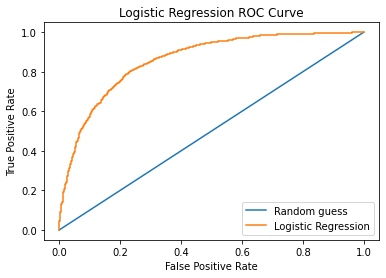

In [ ]:
# Visualization of model performance at all classification thresholds.
y_pred = pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1],'-', label='Random guess')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show();

In [ ]:
# Area under the ROC Curve(AUC) measures the entire two-dimensional 
# area underneath the entire ROC curve
#Print the AUC
roc_auc_score(y_test, y_pred)

0.8600770093974179